In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

monthly_sales = df.groupby('Month', as_index=False)['Total_Sales'].sum()

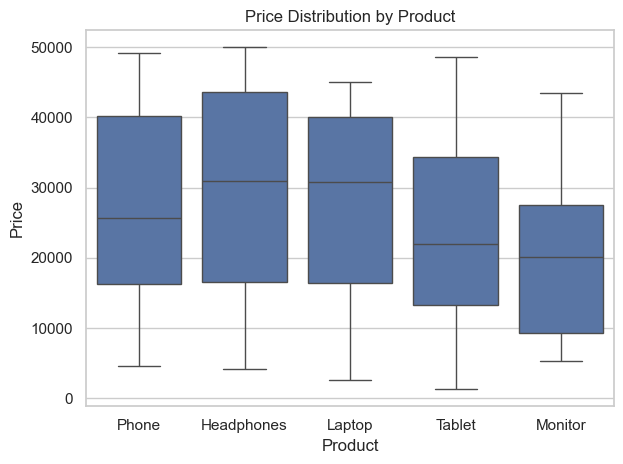

In [21]:
plt.figure()
sns.boxplot(x='Product', y='Price', data=df)
plt.title("Price Distribution by Product")
plt.tight_layout()
plt.show()


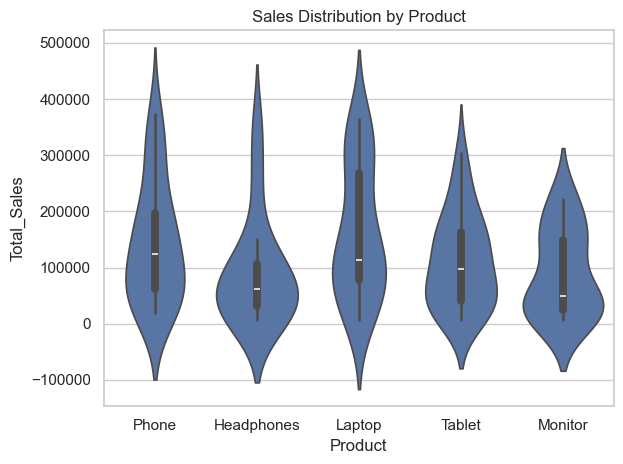

In [22]:
plt.figure()
sns.violinplot(x='Product', y='Total_Sales', data=df)
plt.title("Sales Distribution by Product")
plt.tight_layout()
plt.show()


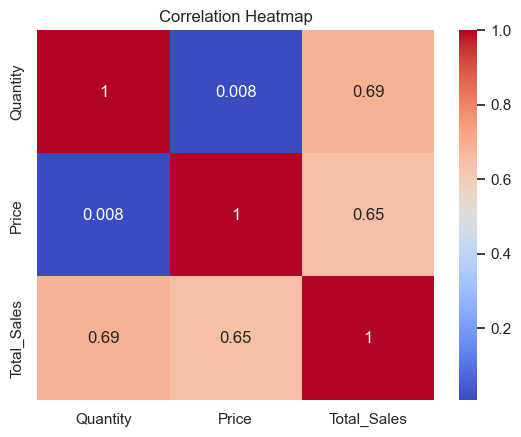

In [23]:
plt.figure()
corr = df[['Quantity', 'Price', 'Total_Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


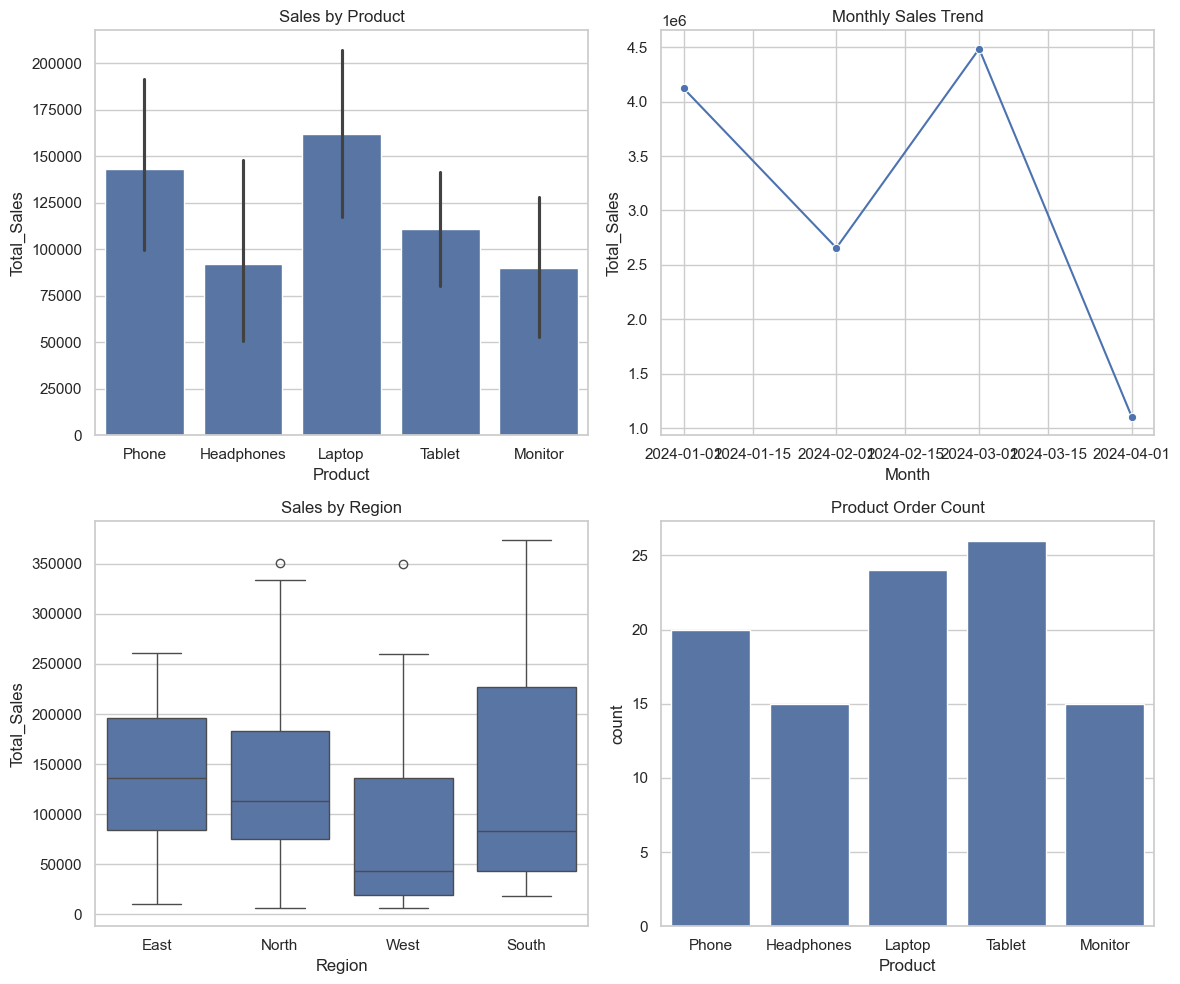

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(ax=axes[0,0], x='Product', y='Total_Sales', data=df)
axes[0,0].set_title("Sales by Product")

sns.lineplot(ax=axes[0,1], x='Month', y='Total_Sales', data=monthly_sales, marker='o')
axes[0,1].set_title("Monthly Sales Trend")

sns.boxplot(ax=axes[1,0], x='Region', y='Total_Sales', data=df)
axes[1,0].set_title("Sales by Region")

sns.countplot(ax=axes[1,1], x='Product', data=df)
axes[1,1].set_title("Product Order Count")

plt.tight_layout()
plt.show()


In [25]:
fig = px.bar(
    df,
    x='Product',
    y='Total_Sales',
    color='Region',
    title="Interactive Product Sales by Region",
    hover_data=['Quantity', 'Price']
)

fig.show()
